In [1]:
from keras.applications.vgg16 import VGG16, decode_predictions, preprocess_input
from keras.models import Sequential, load_model
from keras.layers import Flatten, Dense, Dropout, Conv1D, Conv2D
from keras import optimizers
import keras
import cv2
import os
import numpy as np
from setEmotions import find_emotion_values
import matplotlib.pyplot as plt
import tensorflow as tf
from setEmotions import get_training_data, get_test_data, preprocess_train_images, preprocess_test_images, preprocess_train, preprocess_test, preprocess_validation
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

In [2]:
emotion_label = ["Anger", "Happiness", "Neutral", "Sadness", "Surprise"]

In [3]:
train = preprocess_train()
validation = preprocess_validation()

image_batch, label_batch = next(iter(train))
image_val_batch, label_val_batch = next(iter(validation))

test_gen = preprocess_test()
testX, testY = next(iter(test_gen))

Found 17464 images belonging to 5 classes.
Found 656 images belonging to 5 classes.
hei
Found 55 images belonging to 5 classes.


In [4]:
class CNN(tf.keras.Model):
    def __init__(self):
        super(CNN, self).__init__()
       
        self.VGG = VGG16(weights='imagenet', include_top=False, input_shape=(32, 115, 3))
        self.model = Sequential()
        
        
        counter = 0
        for layer in self.VGG.layers[:-4]:
            if counter < 13:
                layer.trainable = False
            else:
                layer.trainable = True
            #layer.trainable = False
            self.model.add(layer)
            counter += 1
        for layer in self.model.layers:
            print(layer.name, ", ", layer.trainable)
        
        
        self.model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
        self.model.add(tf.keras.layers.Dropout(0.5))
        self.model.add(tf.keras.layers.Flatten())
       
        self.model.add(tf.keras.layers.Dense(256, activation='relu')) 
        self.model.add(tf.keras.layers.Dropout(0.5))
        self.model.add(tf.keras.layers.Dense(5, activation='softmax'))
        
        
        
    def call(self, x):
        x = self.model(x)
        self.model.summary()
      
        return x


In [5]:
model = CNN()
optimizerAdam = tf.keras.optimizers.Adam(learning_rate=0.001, clipnorm=1.0)
optimizerSDG = tf.keras.optimizers.SGD(learning_rate=0.001, clipnorm=1.0)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizerAdam,
              metrics=['acc'])

block1_conv1 ,  False
block1_conv2 ,  False
block1_pool ,  False
block2_conv1 ,  False
block2_conv2 ,  False
block2_pool ,  False
block3_conv1 ,  False
block3_conv2 ,  False
block3_conv3 ,  False
block3_pool ,  False
block4_conv1 ,  False
block4_conv2 ,  False
block4_conv3 ,  True
block4_pool ,  True


In [6]:
num_of_epochs = 20
batch_size = 64

history = model.fit(train, validation_data = validation, batch_size=batch_size, epochs=num_of_epochs, shuffle=True)
res = model.evaluate(test_gen, batch_size=batch_size)
print("Test loss, test acc: ", res)

model.save("Models/model_attempt_9.h5py")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 115, 64)       1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 115, 64)       36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 57, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 57, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 57, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 28, 128)        0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 8, 28, 256)        2

In [7]:
prediction = model.predict(testX)
print("Predictions Tabel: ", prediction)

pred = []
for x in prediction:
    x_max = x.argmax()
    print("prediction = %s" % emotion_label[x_max])
    pred.append(emotion_label[x_max])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 115, 64)       1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 115, 64)       36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 57, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 57, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 57, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 28, 128)        0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 8, 28, 256)        2

In [8]:
cor = []
for x in testY:
    print("actual = %s " % emotion_label[x.argmax()])
    cor.append(emotion_label[x.argmax()])

actual = Surprise 
actual = Surprise 
actual = Happiness 
actual = Anger 
actual = Surprise 
actual = Surprise 
actual = Anger 
actual = Surprise 
actual = Surprise 
actual = Anger 
actual = Sadness 
actual = Neutral 
actual = Surprise 
actual = Surprise 
actual = Happiness 
actual = Neutral 
actual = Anger 
actual = Happiness 
actual = Neutral 
actual = Surprise 
actual = Sadness 
actual = Anger 
actual = Anger 
actual = Neutral 
actual = Happiness 
actual = Sadness 
actual = Sadness 
actual = Happiness 
actual = Neutral 
actual = Happiness 
actual = Sadness 
actual = Sadness 
actual = Sadness 
actual = Happiness 
actual = Surprise 
actual = Happiness 
actual = Sadness 
actual = Anger 
actual = Neutral 
actual = Surprise 
actual = Anger 
actual = Neutral 
actual = Neutral 
actual = Happiness 
actual = Anger 
actual = Happiness 
actual = Neutral 
actual = Sadness 
actual = Happiness 
actual = Sadness 
actual = Neutral 
actual = Anger 
actual = Anger 
actual = Neutral 
actual = Sadness 

In [9]:
train_acc = history.history['acc']
test_acc = history.history['val_acc']
train_loss = history.history['loss']
test_loss = history.history['val_loss']

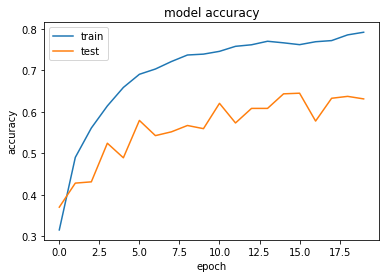

In [10]:
# Plot model accuracy
plt.plot(train_acc)
plt.plot(test_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.savefig('accuracy_attempt_9.png')
plt.show()

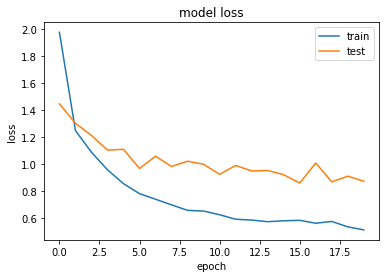

In [11]:
# Plot model loss
plt.plot(train_loss)
plt.plot(test_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.savefig('loss_attempt_9.png')
plt.show()

[[ 5  1  2  1  2]
 [ 0  4  7  0  0]
 [ 0  0 11  0  0]
 [ 0  2  7  2  0]
 [ 0  2  7  0  2]]


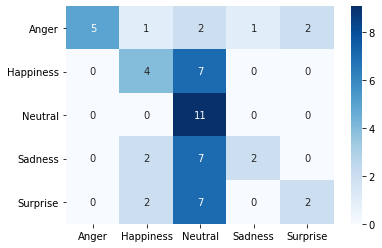

In [12]:
c_matrix = confusion_matrix(cor, pred, labels=emotion_label)
print(c_matrix)
df = pd.DataFrame(c_matrix, index = emotion_label, columns = emotion_label)
sn.heatmap(df, annot=True, cmap = "Blues", robust=True)
plt.savefig('confusionmatrix_attempt_9.png')
plt.show()

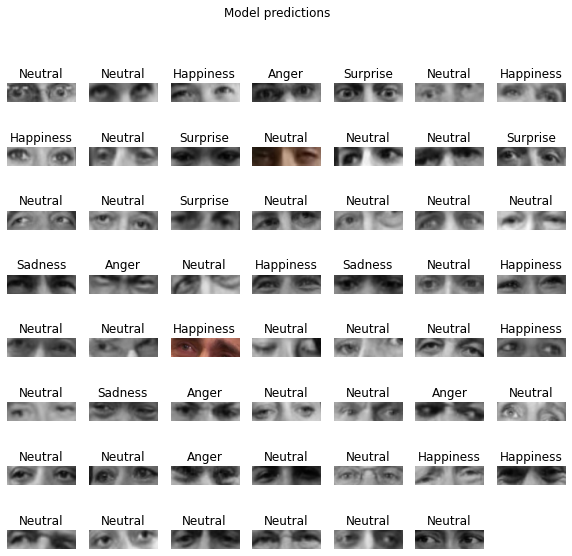

In [13]:
# predictions
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(len(testX)):
    plt.subplot(8,7,n+1)
    plt.imshow(testX[n])
    plt.title(pred[n].title())
    plt.axis('off')
    _ = plt.suptitle("Model predictions")
plt.savefig('prediction_attempt_9.png')

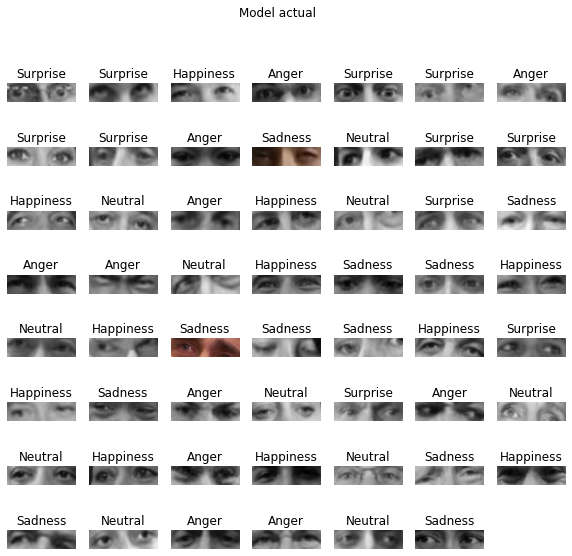

In [14]:
# actual
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(len(testX)):
    plt.subplot(8,7,n+1)
    plt.imshow(testX[n])
    x_max = np.argmax(testY[n]) 
    plt.title((emotion_label[x_max]).title())
    plt.axis('off')
    _ = plt.suptitle("Model actual")
plt.savefig('actual_attempt_9.png')